# TensorFlow Tutorial #01
# Simple Linear Model


## Introduction

 Using neural nets reconising handwritten digits, The human visual system is one of the wonders of the world. Consider the following sequence of handwritten digits: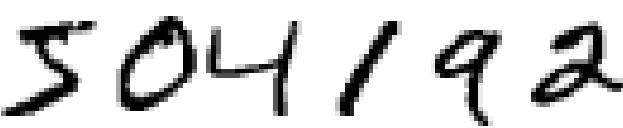
 

## TensorFlow

We’re focusing on handwriting recognition because it’s an excellent prototype problem for
learning about neural networks in general. As a prototype it hits a sweet spot: it’s challenging
– it’s no small feat to recognize handwritten digits – but it’s not so difficult as to require an
extremely complicated solution, or tremendous computational power. Furthermore, it’s a
great way to develop more advanced techniques, such as deep learning. And so throughout
the book we’ll return repeatedly to the problem of handwriting recognition. Later in the
book, we’ll discuss how these ideas may be applied to other problems in computer vision,
and also in speech, natural language processing, and other domains.

## Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

In [2]:
import tensorflow.compat.v1 as tf
#tf.disable_v2_behavior()

This was developed using Python 3.6 (Anaconda) and TensorFlow version:

In [3]:
tf.__version__

'2.0.0'

## Load Data

The MNIST data comes in two parts. The first part contains 60,000 images to be used
as training data. These images are scanned handwriting samples from 250 people, half of
whom were US Census Bureau employees, and half of whom were high school students.
The images are greyscale and 28 by 28 pixels in size. The second part of the MNIST data
set is 10,000 images to be used as test data. Again, these are 28 by 28 greyscale images.
We’ll use the test data to evaluate how well our neural network has learned to recognize
digits. To make this a good test of performance, the test data was taken from a different
set of 250 people than the original training data (albeit still a group split between Census
Bureau employees and high school students). This helps give us confidence that our system
can recognize digits from people whose writing it didn’t see during training.
We’ll use the notation x to denote a training input. It’ll be convenient to regard each
training input x as a 28 28 = 784-dimensional vector. Each entry in the vector represents
the grey value for a single pixel in the image. We’ll denote the corresponding desired output
by y = y(x), where y is a 10-dimensional vector. For example, if a particular training image,
x, depicts a 6, then y(x) = (0, 0, 0, 0, 0, 0, 1, 0, 0, 0)T is the desired output from the network.
Note that T here is the transpose operation, turning a row vector into an ordinary (column)
vector.
What we’d like is an algorithm which lets us find weights and biases so that the output
from the network approximates y(x) for all training inputs x. To quantify how well we’re
achieving this goal we define a cost function : 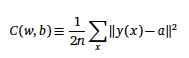


In [4]:
# conda activate tensorflow
# Get the working directory path
import os
current_dir = os.getcwd() + '/data/MNIST'
print(current_dir)

/Users/said/Documents/python courses/IPython/Said_eng/Neural Nets/data/MNIST


In [5]:
 # Import mnist data stored in the following path: current directory -> mnist.npz
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data(path=current_dir+'/mnist.npz')
print('MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))

MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


Copy some of the data-dimensions for convenience.

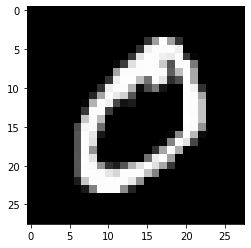

In [6]:
# pick a sample to plot
sample = 1
image = X_train[sample]

# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

### Helper-function for plotting images

Next, we will initialize the figure and axes handles using matplotlib's subplots command, then iteratively display the digit images and labels.

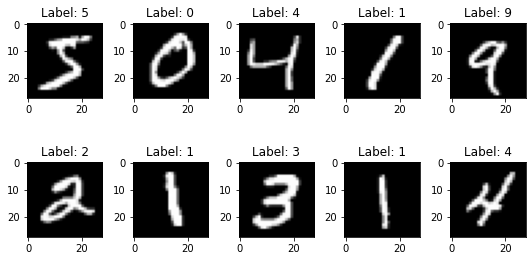

In [7]:
num = 10
images = X_train[:num]
labels = Y_train[:num]

num_row = 2
num_col = 5

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()



A lot happened in the previous command, so we will break it down below. First, we specified the number of rows and columns to be displayed. Next, the subplots command created fig and axes handles, while specifying the figure dimensions through the figsize parameter. Later, a for loop was used to iterate through each of the 10 images. Within the loop, the axes command selects the axis, imshow displays the digit image, and set_title is used to display the digit as a label above each image. The tight_layout command cleans up the image and show tells matplotlib to display the images.


## Preprocess the data

The image data cannot be fed directly into the model so we need to perform some operations and process the data to make it ready for our neural network. The dimension of the training data is (60000,28,28). The CNN model will require one more dimension so we reshape the matrix to shape (60000,28,28,1).


In [8]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
batch_size = 128
num_classes = 10
epochs = 10

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
    # convert class vectors to binary class matrices
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test  = keras.utils.to_categorical(Y_test, num_classes)
X_train = X_train.astype('float32')
X_test  = X_test.astype('float32')
X_train /= 255
X_test  /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

Using TensorFlow backend.


X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Create the model

Now we will create our CNN model in Python data science project. A CNN model generally consists of convolutional and pooling layers. It works better for data that are represented as grid structures, this is the reason why CNN works well for image classification problems. The dropout layer is used to deactivate some of the neurons and while training, it reduces offer fitting of the model. We will then compile the model with the Adadelta optimizer.

In [9]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])


## Train the model

The model.fit() function of Keras will start the training of the model.
It takes the training data, validation data, epochs, and batch size.
It takes some time to train the model. After training, we save the weights 
and model definition in the ‘mnist.h5’ file.

In [10]:
#hist = model.fit(X_train, Y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test, Y_test))
model.fit(X_train, Y_train, nb_epoch=3, batch_size=16,
          validation_split=0.1,   verbose=1)


/opt/miniconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 54000 samples, validate on 6000 samples
Epoch 1/3
54000/54000 [==============================] - 18519s 343ms/step - loss: 0.1495 - accuracy: 0.9551 - val_loss: 0.0460 - val_accuracy: 0.9867
Epoch 2/3
54000/54000 [==============================] - 8521s 158ms/step - loss: 0.0659 - accuracy: 0.9808 - val_loss: 0.0390 - val_accuracy: 0.9895
Epoch 3/3
54000/54000 [==============================] - 3589s 66ms/step - loss: 0.0493 - accuracy: 0.9852 - val_loss: 0.0381 - val_accuracy: 0.9892


In [11]:
print("The model has successfully trained ... good result reached")
model.save('mnist.h5')
print("Saving the model as mnist.h5")

The model has successfully trained ... good result reached
Saving the model as mnist.h5


## Evaluate the model

We have 10,000 images in our dataset which will be used to evaluate how good our model works. 
The testing data was not involved in the training of the data therefore, it is new data for our model. `The MNIST dataset is well balanced so we can get around 99% accuracy. `

In [12]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03234423809759319
Test accuracy: 0.9883000254631042


## Nice Windows that will show % of matching what you write !!!
we have successfully built a Python deep learning project on handwritten digit recognition app. 
We have built and trained the Convolutional neural network which is very effective for image classification purposes

In [ ]:
from keras.models import load_model
from tkinter import *
import tkinter as tk
import win32gui
from PIL import ImageGrab, Image
import numpy as np
model = load_model('mnist.h5')
def predict_digit(img):
#resize image to 28x28 pixels
    img = img.resize((28,28))
        #convert rgb to grayscale
    img = img.convert('L')
    img = np.array(img)
        #reshaping to support our model input and normalizing
    img = img.reshape(1,28,28,1)
    img = img/255.0
        #predicting the class
    res = model.predict([img])[0]
    return np.argmax(res), max(res)
class App(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)
        self.x = self.y = 0
            # Creating elements
        self.canvas = tk.Canvas(self, width=300, height=300, bg = "white", cursor="cross")
        self.label = tk.Label(self, text="Thinking..", font=("Helvetica", 48))
        self.classify_btn = tk.Button(self, text = "Recognise", command =         self.classify_handwriting) 
        self.button_clear = tk.Button(self, text = "Clear", command = self.clear_all)
            # Grid structure
        self.canvas.grid(row=0, column=0, pady=2, sticky=W, )
        self.label.grid(row=0, column=1,pady=2, padx=2)
        self.classify_btn.grid(row=1, column=1, pady=2, padx=2)
        self.button_clear.grid(row=1, column=0, pady=2)
            #self.canvas.bind("<Motion>", self.start_pos)
        self.canvas.bind("<B1-Motion>", self.draw_lines)
    def clear_all(self):
        self.canvas.delete("all")
    def classify_handwriting(self):
        HWND = self.canvas.winfo_id() # get the handle of the canvas
        rect = win32gui.GetWindowRect(HWND) # get the coordinate of the canvas
        im = ImageGrab.grab(rect)
        digit, acc = predict_digit(im)
        self.label.configure(text= str(digit)+', '+ str(int(acc*100))+'%')
    def draw_lines(self, event):
        self.x = event.x
        self.y = event.y
        r=8
        self.canvas.create_oval(self.x-r, self.y-r, self.x + r, self.y + r, fill='black')
app = App()
mainloop()